# H&M Personalized Fashion Recommendations: 3. Popular

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from scipy.sparse import csr_matrix

from tqdm import tqdm
from datetime import datetime, timedelta

import logging
logging.basicConfig(level=logging.INFO)
logging.info("test")

import sys
sys.path.append("..")
from src.utils import *

INFO:root:test


In [2]:
articles = pd.read_csv("../input/articles_proc.csv", dtype={"article_id": str})
customers = pd.read_csv("../input/customers_proc.csv")
transactions_full = pd.read_csv("../input/transactions_full.csv", dtype={"article_id": str})
transactions_train = pd.read_csv("../input/transactions_train.csv", dtype={"article_id": str})
transactions_test = pd.read_csv("../input/transactions_test.csv", dtype={"article_id": str})
submission = pd.read_csv('../input/sample_submission.csv')

In [3]:
articles_id2num = {id_: num for num, id_ in enumerate(articles["article_id"].unique())}
articles_num2id = {num: id_ for id_, num in articles_id2num.items()}

customers_id2num = {id_: num for num, id_ in enumerate(customers["customer_id"].unique())}
customers_num2id = {num: id_ for id_, num in customers_id2num.items()}

In [4]:
def subtract_days(date, days):
    format_date = "%Y-%m-%d"
    new_dt = datetime.strptime(date, format_date) - timedelta(days=days)
    return datetime.strftime(new_dt, format_date)

def get_popular_articles(transactions, k)-> list:
    return transactions["article_id"].value_counts().index.to_list()[:k]

def get_true_articles(transactions) -> pd.Series:
    return transactions.groupby("customer_id")["article_id"].unique().apply(" ".join)

## Популярные за разные размеры временных интервалов 

In [53]:
articles_true_series = get_true_articles(transactions_test)
articles_true_list = [true_for_user.split(" ") for true_for_user in articles_true_series.to_list()]

best_popular_list = None
best_map_score = 0

start_date = "2020-09-15"
i_list = []
map_list = []
for i in tqdm(list(range(1, 31, 1)) + list(range(31, 720, 10)), disable=True):
    split_date = subtract_days(start_date, days=i)
    train = transactions_train[transactions_train["t_dat"] >= split_date]
    
    popular_list = get_popular_articles(train, k)
    popular_list_all = [popular_list] * len(articles_true_list)
    map_score = map_at_k(articles_true_list, popular_list_all, k=12)
    
    if map_score > best_map_score:
        best_map_score = map_score
        best_popular_list = popular_list
    
    i_list.append(i)
    map_list.append(map_score)

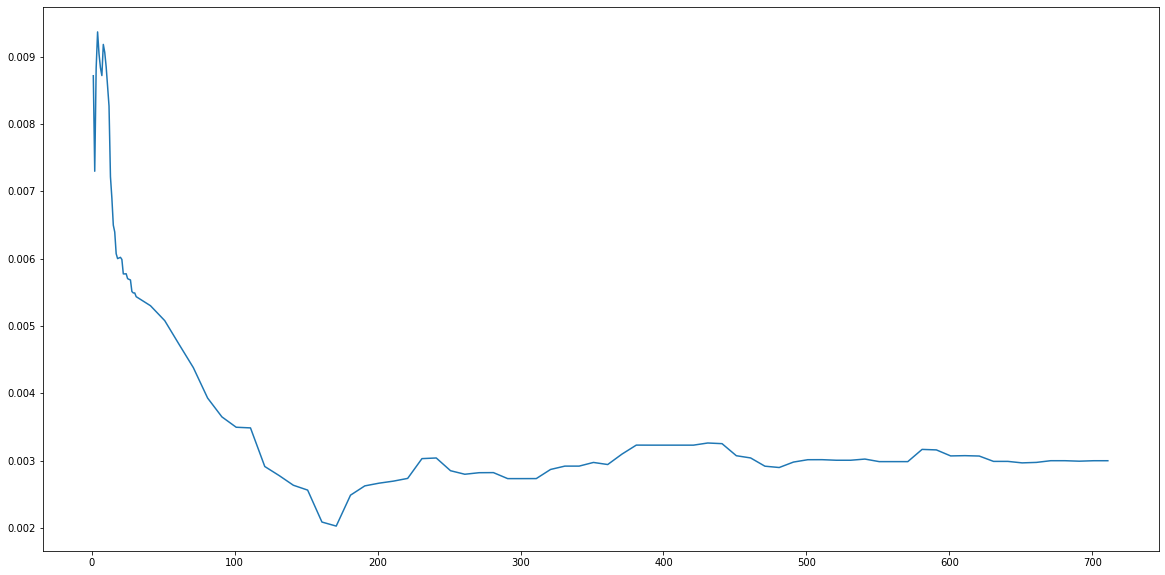

In [54]:
plt.figure(figsize=(20, 10))
plt.plot(i_list, map_list)
plt.show()

In [60]:
subm = pd.read_csv("../input/sample_submission.csv")
subm["prediction"] = " ".join(best_popular_list)

In [63]:
subm.to_csv("../output/5.top_4d_fix.csv", index=False, header=True)

## Популярные по группам 

In [74]:
customers                                

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,price_min,price_max,price_mean,...,Ladieswear_count,Baby/Children_count,Divided_count,Menswear_count,Sport_count,common_group,sex,age_group,has_children,sales_count
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,ACTIVE,NONE,49.0,Other,0.010153,0.054220,0.030904,...,13.0,5.0,2.0,1.0,0.0,Lady,Woman,40-50,1,21.0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,ACTIVE,NONE,25.0,Other,0.006763,0.084729,0.030255,...,62.0,4.0,19.0,0.0,1.0,Lady,Woman,20-30,1,86.0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,ACTIVE,NONE,24.0,Other,0.013542,0.067780,0.037869,...,12.0,0.0,1.0,4.0,1.0,Lady,Woman,20-30,0,17.0
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.0,0.0,ACTIVE,NONE,54.0,Other,0.030492,0.030492,0.030492,...,0.0,0.0,0.0,0.0,2.0,Divided,Unknown,50-60,0,2.0
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,Other,0.016932,0.059305,0.036130,...,11.0,0.0,0.0,0.0,2.0,Lady,Woman,50-60,0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0.0,0.0,ACTIVE,NONE,24.0,Other,0.005068,0.067780,0.025340,...,46.0,0.0,0.0,1.0,4.0,Lady,Woman,20-30,0,51.0
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0.0,0.0,ACTIVE,NONE,21.0,Other,0.005068,0.076254,0.021516,...,27.0,7.0,48.0,2.0,0.0,Divided,Woman,20-30,1,84.0
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,ACTIVE,Regularly,21.0,Other,0.004559,0.042356,0.017532,...,19.0,0.0,18.0,5.0,3.0,Divided,Woman,20-30,0,45.0
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,ACTIVE,Regularly,18.0,Other,0.013542,0.050831,0.029886,...,3.0,0.0,4.0,0.0,0.0,Divided,Woman,10-20,0,7.0


In [80]:
transactions_full

,t_dat,customer_id,article_id,price,sales_channel_1_flg,sales_channel_2_flg
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0663713001,0.050831,0,1
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0541518023,0.030492,0,1
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0505221004,0.015237,0,1
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0685687003,0.016932,0,1
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0685687004,0.016932,0,1
...,...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,0929511001,0.059305,0,1
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,0891322004,0.042356,0,1
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,0918325001,0.043203,1,0
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,0833459002,0.006763,1,0


In [31]:
tr_cust = (
    transactions_full[transactions_full.t_dat >= "2020-08-22"]
        .merge(customers[["customer_id", "age_group"]], 
               on="customer_id", how="inner")
)

In [35]:
from collections import Counter

def join_articles(line):
    top_values = (
        list(map(
            lambda x: x[0], 
            sorted(Counter(line).items(), 
                   key=lambda x: -x[1]
                  )
        ))[:12]
    )
    return " ".join(top_values)

tr_agg = tr_cust.groupby(["age_group"])["article_id"].apply(join_articles)

In [36]:
tr_cust.groupby(["age_group",]).size()

age_group
10-20     42424
20-30    513296
30-40    229799
40-50    172084
50-60    179736
70+       53572
dtype: int64

In [37]:
tr_agg = tr_agg.reset_index().rename({"article_id": "prediction"}, axis=1)
tr_agg

,age_group,prediction
0,10-20,0715624001 0448509014 0706016001 0915526001 09...
1,20-30,0915526001 0918292001 0706016001 0751471001 04...
2,30-40,0918292001 0915529003 0768912001 0909370001 01...
3,40-50,0751471001 0915529003 0751471043 0706016001 08...
4,50-60,0751471043 0751471001 0896152002 0915529003 07...
5,70+,0896152002 0751471043 0933706001 0896169002 09...


In [94]:
group_pop = (
    customers.merge(tr_agg, on=["sex", "age_group", "has_children"], how="inner")
        [["customer_id", "prediction"]]
)

In [96]:
group_pop.to_csv("../output/17.group_pop.csv", index=False, header=True)

## Time 

In [6]:
def get_tr_list(transactions, weeks: int = 4):
    tr_list = []
    max_date = transactions["t_dat"].max()
    for i in range(1, weeks + 1):
        min_date = subtract_days(max_date, 7 * i)
        tr_list.append(transactions[transactions['t_dat'] >= min_date])
    return tr_list

def get_item_dict(transactions):
    purchase_dict = {}

    for i,x in enumerate(zip(transactions['customer_id'], transactions['article_id'])):
        cust_id, art_id = x
        if cust_id not in purchase_dict:
            purchase_dict[cust_id] = {}

        if art_id not in purchase_dict[cust_id]:
            purchase_dict[cust_id][art_id] = 0

        purchase_dict[cust_id][art_id] += 1

    dummy_list = list((transactions['article_id'].value_counts()).index)[:12]
    return purchase_dict, dummy_list

In [7]:
def get_prediction(submission, purchase_list, dummy_list):
    prediction_list = []
    for i, cust_id in enumerate(submission['customer_id']):
        s = None
        for w in range(len(purchase_list)):
            purchase = purchase_list[w]
            dummy = dummy_list[w]

            if cust_id in purchase:
                l = sorted((purchase[cust_id]).items(), key=lambda x: -x[1])
                l = [y[0] for y in l]
                if len(l) > 12:
                    s = ' '.join(l[:12])
                else:
                    s = ' '.join(l + dummy_list[0][:12 - len(l)])
                break
        if s is None:
            s = ' '.join(dummy_list[0])

        prediction_list.append(s)
    submission['prediction'] = prediction_list
    return submission

In [ ]:
for week in range(1, 5):
    tr_list = get_tr_list(transactions_train, weeks=week)
    purchase_list = []
    dummy_list = []
    for transaction_i in tr_list:
        purchase, dummy = get_item_dict(transaction_i)
        purchase_list.append(purchase)
        dummy_list.append(dummy)

    submission = get_prediction(submission, purchase_list, dummy_list)
    map_score = map_at_k(get_true_articles(transactions_test), submission.prediction)
    print(week, map_score)

In [122]:
tr_list = get_tr_list(transactions_full, weeks=4)
purchase_list = []
dummy_list = []
for transaction_i in tr_list:
    purchase, dummy = get_item_dict(transaction_i)
    purchase_list.append(purchase)
    dummy_list.append(dummy)

submission = get_prediction(submission, purchase_list, dummy_list)
submission.to_csv("../output/22.time_bench_w4_dummy_w1.csv", index=False, header=True)

## Time decaying 

In [8]:
def get_prediction(submission, purchase_list, dummy_list):
    prediction_list = []
    for i, cust_id in enumerate(submission['customer_id']):
        s = None
        user_prediction = []
        for w in range(len(purchase_list)):
            purchase = purchase_list[w]
            dummy = dummy_list[w]

            if cust_id in purchase:
                l = sorted((purchase[cust_id]).items(), key=lambda x: -x[1])
                l = [y[0] for y in l if y[0] not in user_prediction]
                user_prediction.extend(l)
        user_prediction.extend([y for y in dummy_list[0] if y not in user_prediction])
        prediction_list.append(' '.join(user_prediction[:12]))
    submission['prediction'] = prediction_list
    return submission

In [11]:
tr_list = get_tr_list(transactions_full, weeks=4)
purchase_list = []
dummy_list = []
for transaction_i in tr_list:
    purchase, dummy = get_item_dict(transaction_i)
    purchase_list.append(purchase)
    dummy_list.append(dummy)

submission = get_prediction(submission, purchase_list, dummy_list)
submission.to_csv("../output/24.time_bench_w5_dummy_w1_priority_first.csv", index=False, header=True)

In [ ]:
def get_prediction(submission, purchase_list, dummy_list):
    prediction_list = []
    for i, cust_id in enumerate(submission['customer_id']):
        s = None
        user_prediction = []
        for w in range(len(purchase_list)):
            purchase = purchase_list[w]
            dummy = dummy_list[w]

            if cust_id in purchase:
                l = sorted((purchase[cust_id]).items(), key=lambda x: -x[1])
                l = [y[0] for y in l if y[0] not in user_prediction]
                user_prediction.extend(l)
        user_prediction.extend([y for y in dummy_list[0] if y not in user_prediction])
        prediction_list.append(' '.join(user_prediction[:12]))
    submission['prediction'] = prediction_list
    return submission

In [27]:
from collections import defaultdict
tr_list = get_tr_list(transactions_full, weeks=4)
purchase_list = []
dummy_list = []
for transaction_i in tr_list:
    purchase, dummy = get_item_dict(transaction_i)
    purchase_list.append(purchase)
    dummy_list.append(dummy)

purchase_general = defaultdict(dict)

for i in range(len(purchase_list)):
    for cust_id, item_dict in purchase_list[i].items():
        for item_id, cnt in item_dict.items():
            purchase_general[cust_id][item_id] = cnt / 2**i 

In [28]:
def get_prediction(submission, purchase_general, dummy_list):
    prediction_list = []
    for i, cust_id in enumerate(submission['customer_id']):
        s = None
        user_prediction = []
        if cust_id in purchase_general:
            l = sorted((purchase_general[cust_id]).items(), key=lambda x: -x[1])
            l = [y[0] for y in l if y[0]]
            user_prediction.extend(l)
        user_prediction.extend([y for y in dummy_list[0] if y not in user_prediction])
        prediction_list.append(' '.join(user_prediction[:12]))
    submission['prediction'] = prediction_list
    return submission

In [30]:
submission = get_prediction(submission, purchase_general, dummy_list)
submission.to_csv("../output/26.time_bench_w4_dummy_w1_general_purchase_2_i.csv", index=False, header=True)